We perform cross-validation for different models for classification and save the results.

# Imports

In [1]:
# Standard imports

import pandas as pd
import numpy as np

In [2]:
# Sklearn imports

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Load data

In [ ]:
from src.utils import get_data

data = get_data(classification=True)
X_train, y_train = data[0], data[2]

# Define models

In [ ]:
log_reg = (
    "log_reg",
    LogisticRegression(solver="liblinear"),
    {"log_reg__penalty": ["l1", "l2"], "log_reg__C": np.logspace(-2, 3, 6)},
)


knn = ("knn", KNeighborsClassifier(), {"knn__n_neighbors": [1, 3, 5, 10, 20, 50]})

svm_lin = (
    "svm_lin",
    SVC(kernel="linear"),
    {
        "svm_lin__C": np.logspace(-3, 3, 7),
    },
)

svm_rbf = (
    "svm_rbf",
    SVC(kernel="rbf"),
    {
        "svm_rbf__C": np.logspace(-3, 3, 7),
        "svm_rbf__gamma": np.logspace(-4, 2, 7),
    },
)

gaussian_nb = ("gaussian_nb", GaussianNB(), {})

random_forest = (
    "random_forest",
    RandomForestClassifier(random_state=314),
    {
        "random_forest__n_estimators": [10, 100, 500, 1000],
        "random_forest__max_depth": [1, 3, 5, 10],
    },
)


models = [log_reg, knn, svm_lin, svm_rbf, gaussian_nb, random_forest]

# Apply CV

In [ ]:
from src.utils import grid_search_best, l2_score

results_dic = {}

for model in models:
    scores = []
    for scoring in ["accuracy", "f1_macro", l2_score]:
        scores.extend(grid_search_best(X_train, y_train, *model, scoring=scoring))
    results_dic[model[0]] = scores

results = pd.DataFrame(results_dic)

In [33]:
results

,log_reg,knn,svm_lin,svm_rbf,gaussian_nb,random_forest
0,"{'log_reg__C': 1.0, 'log_reg__penalty': 'l2'}",{'knn__n_neighbors': 10},{'svm_lin__C': 10.0},"{'svm_rbf__C': 1000.0, 'svm_rbf__gamma': 0.0001}",{},"{'random_forest__max_depth': 5, 'random_forest..."
1,0.409545,0.383168,0.455937,0.45595,0.389601,0.412782
2,"{'log_reg__C': 100.0, 'log_reg__penalty': 'l1'}",{'knn__n_neighbors': 10},{'svm_lin__C': 10.0},"{'svm_rbf__C': 100.0, 'svm_rbf__gamma': 0.01}",{},"{'random_forest__max_depth': 5, 'random_forest..."
3,0.311673,0.354751,0.395219,0.385643,0.36977,0.360211
4,"{'log_reg__C': 100.0, 'log_reg__penalty': 'l1'}",{'knn__n_neighbors': 10},{'svm_lin__C': 10.0},"{'svm_rbf__C': 100.0, 'svm_rbf__gamma': 0.01}",{},"{'random_forest__max_depth': 5, 'random_forest..."
5,-0.122602,-0.124201,-0.111599,-0.110536,-0.118058,-0.119876


We see that the SVM performs best. Considering the very small differences between kenels, it makes sense to use the linear kernel with C = 10.

Let us the log reg and SVM models try with polynomial features.

In [36]:
models_poly = [log_reg, svm_lin, svm_rbf]
results_dic_poly = {}

for model in models_poly:
    scores = []
    for scoring in ["accuracy", "f1_macro", l2_score]:
        scores.extend(grid_search_best(X_train, y_train, *model, scoring=scoring, polyfeat=True))
    results_dic_poly[model[0]] = scores

results_poly = pd.DataFrame(results_dic_poly)

In [37]:
results_poly

,log_reg,svm_lin,svm_rbf
0,"{'log_reg__C': 1.0, 'log_reg__penalty': 'l1', ...","{'poly_feat__degree': 1, 'svm_lin__C': 10.0}","{'poly_feat__degree': 1, 'svm_rbf__C': 1000.0,..."
1,0.432713,0.455937,0.45595
2,"{'log_reg__C': 10.0, 'log_reg__penalty': 'l1',...","{'poly_feat__degree': 1, 'svm_lin__C': 10.0}","{'poly_feat__degree': 1, 'svm_rbf__C': 100.0, ..."
3,0.393175,0.395219,0.385643
4,"{'log_reg__C': 1.0, 'log_reg__penalty': 'l1', ...","{'poly_feat__degree': 2, 'svm_lin__C': 1.0}","{'poly_feat__degree': 1, 'svm_rbf__C': 100.0, ..."
5,-0.112229,-0.110702,-0.110536


We only see an improvement for logistic regression, and it is still not as good as SVM, so we stick to linear SVM with C = 10.

In [41]:
# Save results

results.to_csv("../results/classification/CV_results.csv")
results_poly.to_csv("../results/classification/CV_poly_results.csv")

# Prediction

In [ ]:
from sklearn.svm import SVC

model1 = SVC(kernel="linear", C=10, probability=True).fit(X_trainval, y_trainval)

In [97]:
X_pred = [
    [18, 19, 5, 96],
    [5, 12, 2, 50],
    [12, 15, 5, 70],
    [18, 20, 5, 50],
    [7, 2, 1, 85],
    [18, 0, 0, 80],
    [10, 18, 5, 60],
]

In [107]:
pred1 = model1.predict_proba(X_pred)

c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

model2 = CalibratedClassifierCV(
    LogisticRegression(C=100, max_iter=10000, solver="liblinear").fit(
        X_trainval, y_trainval
    )
).fit(X_trainval, y_trainval)

# Must double check this and do cv and calibrate on different set.

In [119]:
pred2 = model2.predict_proba(X_pred)

c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\raoul\anaconda3\envs\grade-prediction\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not h

([<matplotlib.patches.Wedge at 0x1d0053ddd10>,
 [Text(0.4176004630803676, 1.0176491798429668, 'A'),
  Text(-1.0813901134999002, 0.20148305741345407, 'A-'),
  Text(-0.7328224717306365, -0.8203482339388564, 'B'),
  Text(0.07349197211401581, -1.0975422224382956, 'B+'),
  Text(0.6102405613859205, -0.9152084228411563, 'B-'),
  Text(0.8614998872287151, -0.6839721809437218, 'C'),
  Text(1.042355953023143, -0.35141722666542036, 'C+'),
  Text(1.0973290173745838, -0.07660957921650918, 'D'),
  Text(1.0999966241772434, -0.002725215343474844, 'F')])

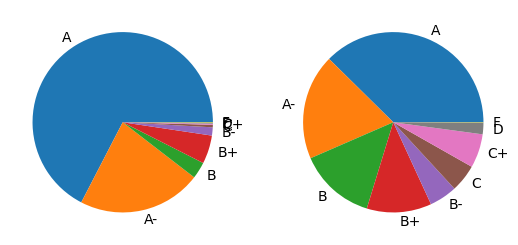

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].pie(pred1[0], labels=model1.classes_)
ax[1].pie(pred2[0], labels=model2.classes_)

([<matplotlib.patches.Wedge at 0x1d005558050>,
 [Text(1.099999999987423, 5.260164880362898e-06, 'A'),
  Text(1.0999985688998088, 0.001774378306015611, 'A-'),
  Text(1.0913550679872286, 0.1376376241388655, 'B'),
  Text(1.0554747420646429, 0.30979520471365524, 'B+'),
  Text(0.9270329185951346, 0.5921232708152809, 'B-'),
  Text(-0.07760722731503904, 1.0972589112276427, 'C'),
  Text(-0.995628845489926, 0.4676785242326157, 'C+'),
  Text(-0.7642148898272569, -0.7911861994286261, 'D'),
  Text(0.8655610280214389, -0.6788255348544795, 'F')])

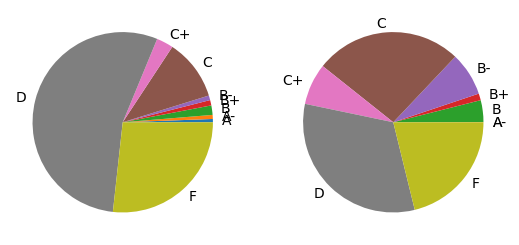

In [122]:
fig, ax = plt.subplots(1, 2)
ax[0].pie(pred1[1], labels=model1.classes_)
ax[1].pie(pred2[1], labels=model2.classes_)

([<matplotlib.patches.Wedge at 0x1d005350b90>,
 [Text(1.0999929982549805, 0.003924766237444336, 'A'),
  Text(1.0957400235749046, 0.09671504917057931, 'A-'),
  Text(0.8910217731164598, 0.645042789148441, 'B'),
  Text(0.1857501108471762, 1.0842033463886107, 'B+'),
  Text(-0.517557435284194, 0.9706360292004659, 'B-'),
  Text(-1.099281607600647, -0.03974854954507704, 'C'),
  Text(-0.2762065476876338, -1.0647581617505824, 'C+'),
  Text(0.797825649442726, -0.7572808152140741, 'D'),
  Text(1.0944756158208178, -0.1101050696999992, 'F')])

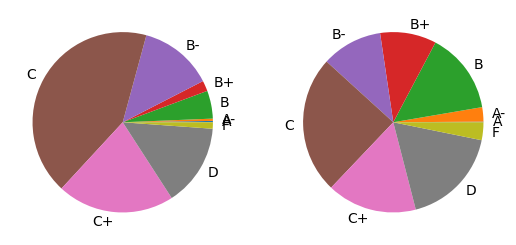

In [117]:
fig, ax = plt.subplots(1, 2)
ax[0].pie(pred1[2], labels=model1.classes_)
ax[1].pie(pred2[2], labels=model2.classes_)